# KCCA Tutorial

This algorithm runs KCCA on two views of data. The kernel implementations, parameter 'ktype', are linear, polynomial and gaussian. Linear kernel has one parameter: 'constant'. Polynomial kernel has two parameters: 'constant', 'degree'. Gaussian kernel has one parameter: 'sigma'.

When initializing KCCA, you can also initialize the following parameters: the regularization parameter 'reg' and the number of canonical components 'n_components'.

In [143]:
%matplotlib inline
import numpy as np
from mvlearn.embed.kcca import KCCA
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from scipy import stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Function creates Xs, a list of two views of data with a linear relationship, polynomial relationship (2nd degree) and a gaussian relationship.

In [111]:
def make_data(kernel, N):
    # # # Define two latent variables (number of samples x 1)
    latvar1 = np.random.randn(N,)
    latvar2 = np.random.randn(N,)
    
    # # # Define independent components for each dataset (number of observations x dataset dimensions)
    indep1 = np.random.randn(N, 4)
    indep2 = np.random.randn(N, 5)
    
    if kernel == "linear":
        x = 0.25*indep1 + 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2)).T
        y = 0.25*indep2 + 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2, latvar1)).T
        
        return [x,y]
    
    elif kernel == "poly":
        x = 0.25*indep1 + 0.75*np.vstack((latvar1**2, latvar2**2, latvar1**2, latvar2**2)).T
        y = 0.25*indep2 + 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2, latvar1)).T
        
        return [x,y]
    
    elif kernel == "gaussian":
        t = np.random.uniform(-np.pi, np.pi, N)
        e1 = np.random.normal(0, 0.05, (N,2))
        e2 = np.random.normal(0, 0.05, (N,2))
        
        x = np.zeros((N,2))
        x[:,0] = t
        x[:,1] = np.sin(3*t)
        x += e1
        
        y = np.zeros((N,2))
        y[:,0] = np.exp(t/4)*np.cos(2*t)
        y[:,1] = np.exp(t/4)*np.sin(2*t)
        y += e2
        
        return [x,y]
    
def plot_components(components, labels=None):
    # We plot dimensions of both views to further show that the first two dimensions are linearly correlated ideally
    n_dim = components[0].shape[1]
    fig,axes = plt.subplots(n_dim,n_dim,figsize=(8,8))#, sharex=True, sharey=True)
    for i,ax in enumerate(axes.flatten()):
        dim2 = int(i/n_dim)
        dim1 = i % n_dim
        if not labels is None:
            ax.scatter(components[0][:,dim1],components[1][:,dim2], c=labels, alpha=0.2)
        else:
            ax.scatter(components[0][:,dim1],components[1][:,dim2])
        if dim2 == n_dim-1:
            ax.set_xlabel(f'View 1 Component {dim1+1}')
        if dim1 == 0:
            ax.set_ylabel(f'View 2 Component {dim2+1}')
        ax.axis('equal')
        #ax.set_xticks([])

    plt.show()

# Linear kernel implementation

In [25]:
Xs_train = make_data('linear', 200)
Xs_test = make_data('linear', 200)

## Original Data Plotted

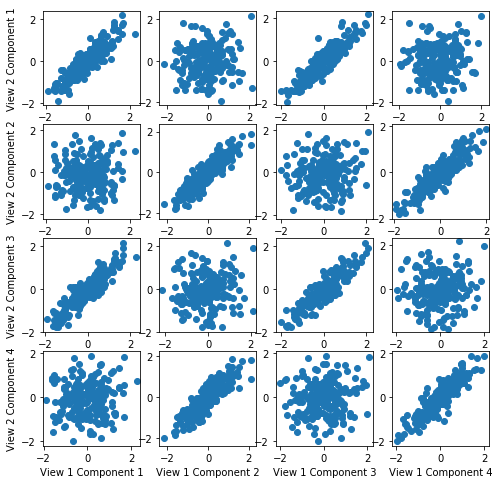

In [30]:
plot_components(Xs_train)

## Transformed Data Plotted

In [114]:
kcca_l = KCCA(ktype ="linear", reg=0.1, constant=1.0, n_components = 4)#, test=True)
linearkcca = kcca_l.fit(Xs_train).transform(Xs_train)

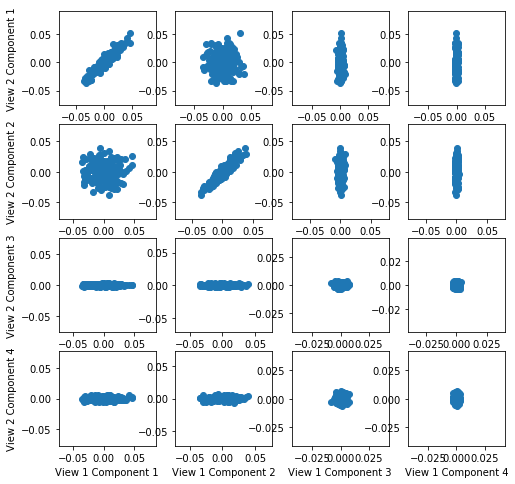

In [115]:
plot_components(linearkcca)

# Polynomial kernel implementation

In [117]:
Xsp_train = make_data("poly", 200)
Xsp_test = make_data("poly", 200)

## Original Data Plotted

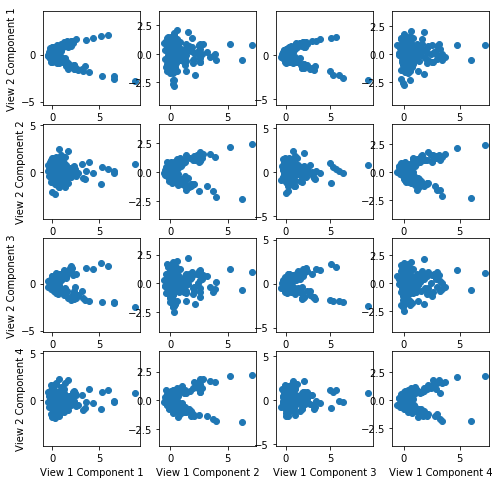

In [118]:
plot_components(Xsp)

## Transformed Data Plotted

In [152]:
kcca_p = KCCA(ktype ="poly", reg = 0.02, degree = 2.0, n_components = 4)
polykcca = kcca_p.fit_transform(Xsp)

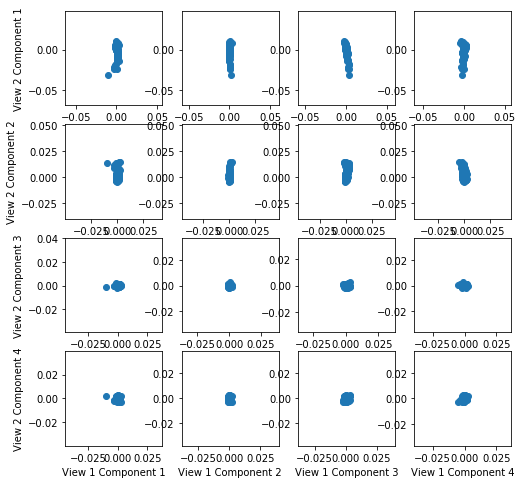

In [153]:
plot_components(polykcca)

In [154]:
np.corrcoef(polykcca[0][:,0], polykcca[1][:,0])

array([[1.        , 0.03819348],
       [0.03819348, 1.        ]])

# Gaussian Kernel Implementation

In [155]:
Xsg_train = make_data("gaussian", 200)
Xsg_test = make_data("gaussian", 200)

## Original Data Plotted

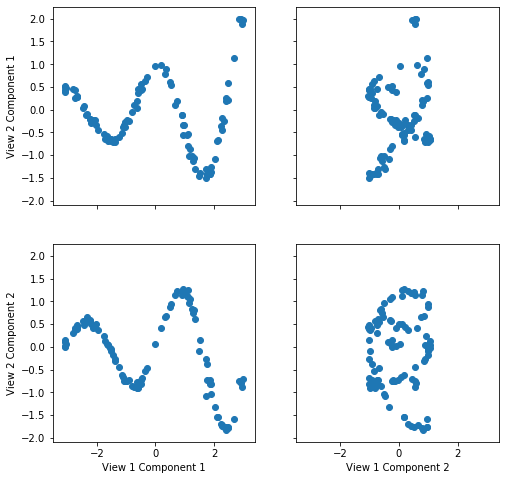

In [32]:
plot_components(Xsg)

In [167]:
kcca_g = KCCA(ktype ="gaussian", reg=10.0, sigma = 3.0, n_components = 2)
gausskcca = kcca_g.fit_transform(Xsg_train)

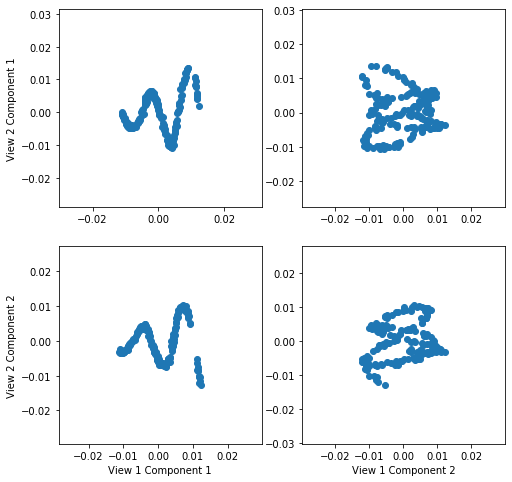

In [168]:
plot_components(gausskcca)